# Libraries :

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import pandas as pd

# Load Images

In [2]:
img_path = sorted(glob.glob('../input/iam-handwritten-forms-dataset/data/*/*.png'))

In [3]:
len(img_path)

1539

## Keras-ocr for Optical Character Recognition :

In [4]:
!pip install keras-ocr

     |████████████████████████████████| 57 kB 694 kB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 870 kB 54.9 MB/s eta 0:00:01
     |████████████████████████████████| 179 kB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 47.8 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 4.8 MB/s  eta 0:00:01
  Created wheel for keras-ocr: filename=keras_ocr-0.8.7-py3-none-any.whl size=43748 sha256=cd23a1e9eafb7b5ac8c85429fb445fc32749a6b1c808b0b9fdd46ca976c4d003
  Stored in directory: /root/.cache/pip/wheels/e4/e4/f3/05528293e01d7fa089343d5a5fd63dd07d79f57103fe9fc159
Successfully built keras-ocr


In [5]:
import keras_ocr

2021-09-13 05:21:52.142852: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-13 05:21:52.142986: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


2021-09-13 05:22:08.442949: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-13 05:22:08.445787: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-13 05:22:08.445827: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-13 05:22:08.445871: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d6930c93506b): /proc/driver/nvidia/version does not exist
2021-09-13 05:22:08.446248: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Looking for /root/.keras-ocr/crnn_kurapan.h5


## Image cosists of corpus to detect for line base on word detection :

In [22]:
new_images= [i[250:750, 250:2250] for i in (keras_ocr.tools.read(path) for path in [img_path[0], img_path[1], img_path[2]])]
np.array(new_images).shape

(3, 500, 2000, 3)

### Demo Image:

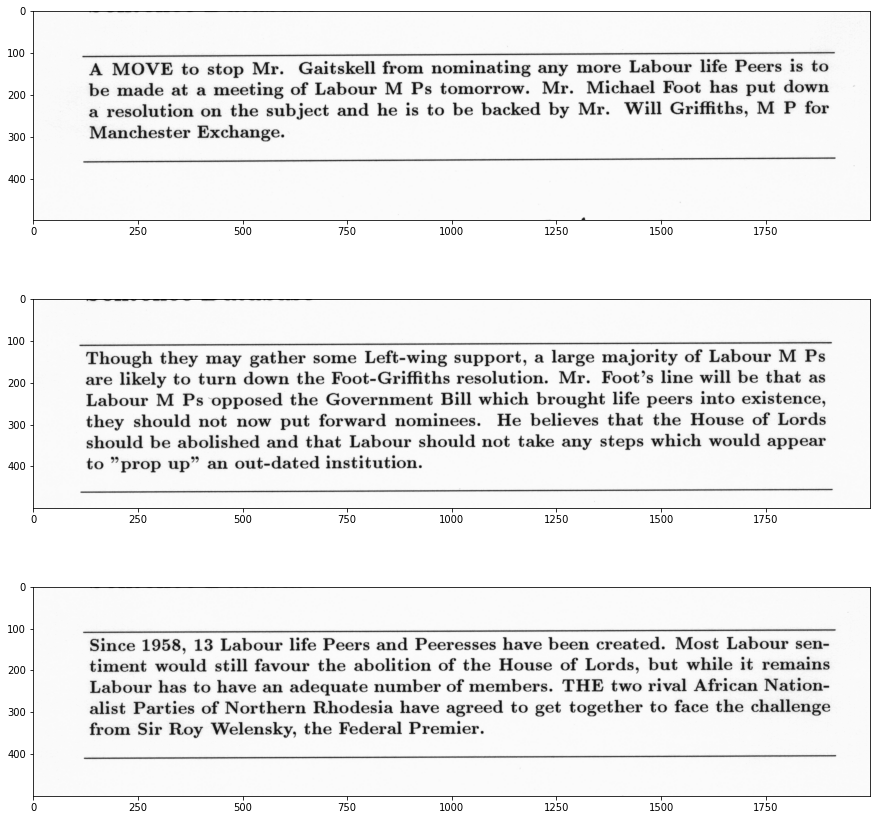

In [24]:
nrows = 3
ncols = 1
fig = plt.subplots(figsize=(15,15))

for row in range(nrows):
    for col in range(ncols):
        
        for page in range(len(new_images)):
            plt.subplot(nrows,ncols,page+1)
            plt.imshow(new_images[page])
            

## Prediction in form of word label and respective coordinates :

In [13]:
prediction_groups = pipeline.recognize(new_images)

2021-09-13 05:23:14.248210: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-13 05:23:14.260524: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


In [14]:
prediction_groups

[[('labour',
   array([[1421.875   ,  115.234375],
          [1576.1719  ,  115.234375],
          [1576.1719  ,  152.34375 ],
          [1421.875   ,  152.34375 ]], dtype=float32)),
  ('life',
   array([[1589.8438  ,  115.234375],
          [1660.1562  ,  115.234375],
          [1660.1562  ,  150.39062 ],
          [1589.8438  ,  150.39062 ]], dtype=float32)),
  ('peers',
   array([[1675.7812 ,  117.1875 ],
          [1791.0156 ,  117.1875 ],
          [1791.0156 ,  150.39062],
          [1675.7812 ,  150.39062]], dtype=float32)),
  ('is',
   array([[1804.6875  ,  115.234375],
          [1841.7969  ,  115.234375],
          [1841.7969  ,  150.39062 ],
          [1804.6875  ,  150.39062 ]], dtype=float32)),
  ('nominating',
   array([[ 950.0293 ,  110.31919],
          [1192.7462 ,  119.06575],
          [1191.1674 ,  162.87497],
          [ 948.4505 ,  154.12842]], dtype=float32)),
  ('to',
   array([[1857.4219  ,  119.140625],
          [1902.3438  ,  119.140625],
          [1902.343

## KERAS-OCR word detection visualization :

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


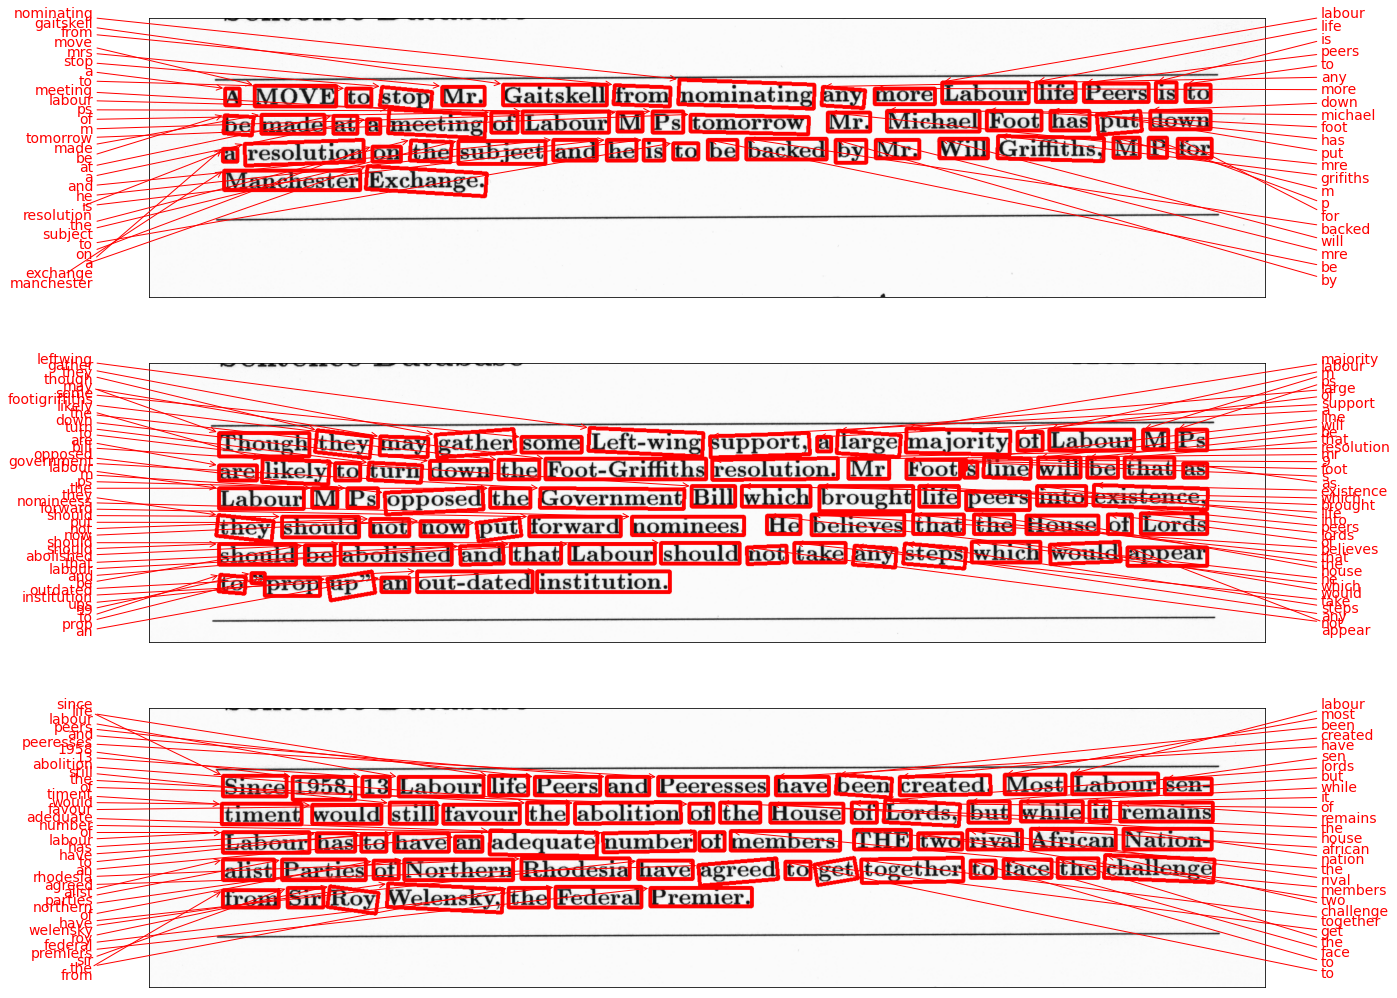

In [25]:
fig,axes = plt.subplots(nrows=len(new_images), figsize=(20,18))
for ax, image, prediction in zip(axes, new_images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)

## Parse value preproccessing :

In [15]:
final_labels = []
final_arrays = []
labels = []
arrays = []
for pic in range(len(prediction_groups)):
    for i in range(np.array(prediction_groups[pic]).shape[0]):
        (label, array) = prediction_groups[pic][i]
        labels.append(label)
        arrays.append(array)
    final_arrays.append(arrays)
    final_labels.append(labels)
    arrays = []
    labels = []

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [16]:
np.array(final_arrays).shape , np.array(final_labels).shape , np.array(arrays).shape , np.array(labels).shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


((3,), (3,), (0,), (0,))

## Coordinate calculation for line in corpus :

 Here, we made dataframe consists of coordites array and respective label, In that we have sorted arrays base on y1 pixel value, By that we can get word detected pixel wise, After that putted condition for line separation that difference of respective pixels beyond 18 will be counted as that word is separate from current line

In [18]:
cord = []
final_cord = []
for i in range(len(final_arrays)):
#     print(np.array(final_arrays[i]).shape)
    df = pd.DataFrame()
    df["labels"] = pd.Series(final_labels[i])
    df["arrays"] = pd.Series(final_arrays[i])
    
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for j in range(len(df["arrays"])):
        x1.append(final_arrays[i][j][0][0])
        y1.append(final_arrays[i][j][0][1])
        x2.append(final_arrays[i][j][2][0])
        y2.append(final_arrays[i][j][2][1])
        
        
    df["x1"] = pd.Series(x1)
    df["x2"] = pd.Series(x2)
    df["y1"] = pd.Series(y1)
    df["y2"] = pd.Series(y2)
        
    
    data = df.sort_values(by=["y1", "y2"], ascending=[True, True], ignore_index=True)
    
    
    sorted_list = []
    sorted_labels = []
    temp_list = []
    temp_labels = []
    
    for a in range(len(data["y1"])-1):
        if data["y1"][a+1] - data["y1"][a] <= 18 and a != len(data["y1"])-2:

            temp_list.append(data["arrays"][a])
            temp_labels.append(data["labels"][a])

        elif data["y1"][a+1] - data["y1"][a] <= 18 and a == len(data["y1"])-2:

            temp_list.append(data["arrays"][a])
            temp_list.append(data["arrays"][a+1])

            temp_labels.append(data["labels"][a])
            temp_labels.append(data["labels"][a+1])

            sorted_list.append(temp_list)
            sorted_labels.append(temp_labels)

            temp_list = []
            temp_labels = []

        elif data["y1"][a+1] - data["y1"][a] > 18 and a == len(data["y1"])-2:

            temp_list.append(data["arrays"][a])

            temp_labels.append(data["labels"][a])

            sorted_list.append(temp_list)
            sorted_labels.append(temp_labels)

    #         temp_list = []


        else :
            temp_list.append(data["arrays"][a])

            temp_labels.append(data["labels"][a])

            sorted_list.append(temp_list)
            sorted_labels.append(temp_labels)

            temp_list = []
            temp_labels = []
            
    
    for line in range(len(sorted_list)):
        y1 = []
        y2 = []
        h2 = []
        x1 = []
        x2 = []
        w1 = []
        for k in range(len(sorted_list[line])):
            y1.append(sorted_list[line][k][0][1])
            y2.append(sorted_list[line][k][2][1])
            h2.append(sorted_list[line][k][3][1])
            x1.append(sorted_list[line][k][0][0])
            x2.append(sorted_list[line][k][2][0])
            w1.append(sorted_list[line][k][1][0])
        
        final_data = pd.DataFrame()
        final_data["labels"] = pd.Series(sorted_labels[line])
        final_data["y1"] = pd.Series(y1)
        final_data["y2"] = pd.Series(y2)
        final_data["h2"] = pd.Series(h2)
        final_data["x1"] = pd.Series(x1)
        final_data["x2"] = pd.Series(x2)
        final_data["w1"] = pd.Series(w1)
        
        y1 = min(final_data["y1"])
        y2 = max(final_data["y2"])
        h2 = max(final_data["h2"])
        x1 = min(final_data["x1"])
        x2 = max(final_data["x2"])
        w1 = max(final_data["w1"])
        
        cord.append([y1, h2, x1, w1, x2, y2])
    
    final_cord.append(cord)
    cord = []
        

## Bounding Box for line in corpus :

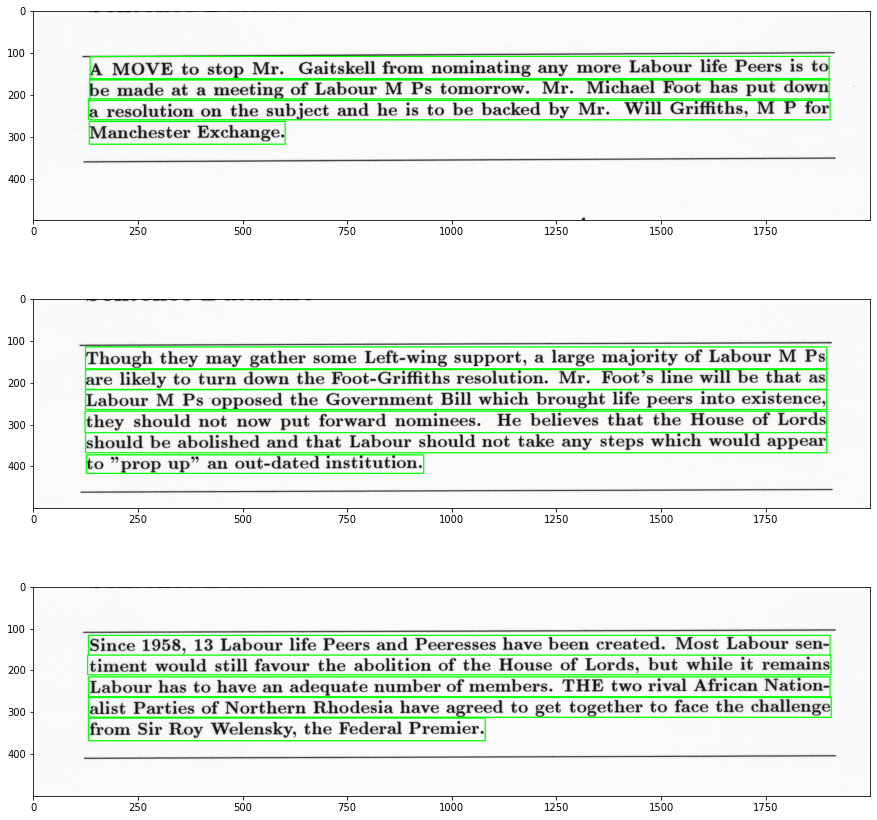

In [20]:
nrows = 3
ncols = 1
fig = plt.subplots(figsize=(15,15))

for row in range(nrows):
    for col in range(ncols):
        
        for page in range(len(new_images)):
            for line in range(len(final_cord[page])):
                y1, h2, x1, w1, x2, y2 = np.array(final_cord[page][line])

                cv2.rectangle(new_images[page], (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0) ,2)
            plt.subplot(nrows,ncols,page+1)
            plt.imshow(new_images[page])
            